This notebook is mainly for generating graphs for exports of certain goods among countries
for the purpose of visualization of WTN.

In [1]:
%matplotlib inline
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pylab as pl
from matplotlib import cm
import numpy as np
import seaborn as sns
import timeit
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png

In [2]:
WTN = pd.read_csv('/Users/YuchenZheng/Downloads/year_origin_destination_hs07_4.tsv',sep='\t')

In [3]:
WTN = WTN.fillna(0)

In [4]:
WTN2010 = WTN[WTN['year'] == 2010]
WTN2010.head()

,year,origin,dest,hs07,export_val,import_val
9134246,2010,ago,bfa,9703,0.0,15048.0
9134247,2010,ago,civ,806,0.0,59603.0
9134248,2010,ago,civ,902,0.0,434125.0
9134249,2010,ago,civ,1202,0.0,10010.0
9134250,2010,ago,civ,1704,0.0,10663.0


In [5]:
tea2010_1 = WTN[(WTN['hs07'] == 902) & (WTN['export_val']>0) & (WTN['year'] == 2010)]
tea2010_1

,year,origin,dest,hs07,export_val,import_val
9145527,2010,bdi,cod,902,2104.00,0.00
9145588,2010,bdi,egy,902,156450.56,0.00
9145696,2010,bdi,ken,902,277924.01,0.00
9146326,2010,bdi,tza,902,38660.00,0.00
9148136,2010,bdi,jpn,902,36800.29,0.00
9148244,2010,bdi,omn,902,1805110.00,0.00
9148247,2010,bdi,pak,902,6944124.80,0.00
9150056,2010,bdi,pol,902,413819.79,0.00
9153988,2010,ben,fra,902,2631.36,54348.00
9156388,2010,bfa,gha,902,39941.00,0.00


161

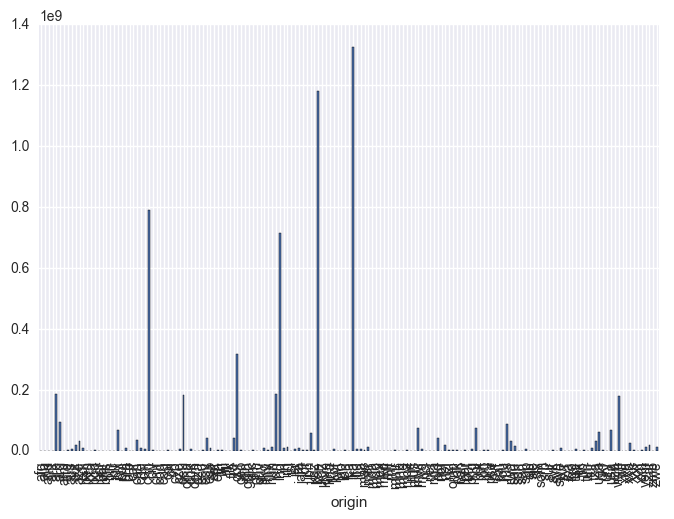

In [6]:
test=tea2010_1.groupby(by=['origin'])['export_val'].sum()
test.plot(kind = 'bar')
len(test)

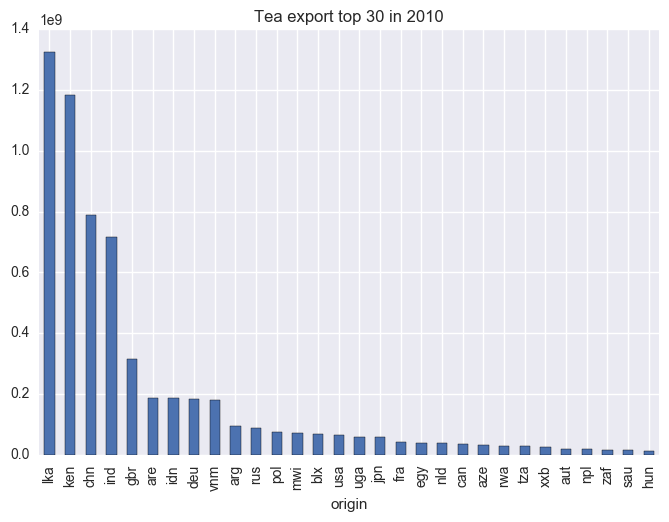

In [7]:
test.sort_values(ascending=False)
test1 = test.nlargest(30)
test1.plot(kind='bar', title = "Tea export top 30 in 2010")

In [8]:
sri_lanka2008 = WTN[(WTN['origin'] == "lka") & (WTN['export_val']>0) & (WTN['year'] == 2008)]
sri_lanka2009 = WTN[(WTN['origin'] == "lka") & (WTN['export_val']>0) & (WTN['year'] == 2009)]
sri_lanka2010 = WTN[(WTN['origin'] == "lka") & (WTN['export_val']>0) & (WTN['year'] == 2010)]
sri_lanka2011 = WTN[(WTN['origin'] == "lka") & (WTN['export_val']>0) & (WTN['year'] == 2011)]
sri_lanka2012 = WTN[(WTN['origin'] == "lka") & (WTN['export_val']>0) & (WTN['year'] == 2012)]
china2008 = WTN[(WTN['origin'] == "chn") & (WTN['export_val']>0) & (WTN['year'] == 2008)]
china2009 = WTN[(WTN['origin'] == "chn") & (WTN['export_val']>0) & (WTN['year'] == 2009)]
china2010 = WTN[(WTN['origin'] == "chn") & (WTN['export_val']>0) & (WTN['year'] == 2010)]
china2011 = WTN[(WTN['origin'] == "chn") & (WTN['export_val']>0) & (WTN['year'] == 2011)]
china2012 = WTN[(WTN['origin'] == "chn") & (WTN['export_val']>0) & (WTN['year'] == 2012)]

In [9]:
sri_lanka2012

,year,origin,dest,hs07,export_val,import_val
20230199,2012,lka,ago,801,158924.00,0.0
20230200,2012,lka,ago,902,3737194.00,0.0
20230201,2012,lka,ago,1905,138041.00,0.0
20230202,2012,lka,ago,4011,177719.00,0.0
20230203,2012,lka,ago,4012,75340.00,0.0
20230204,2012,lka,ago,4013,14657.00,0.0
20230205,2012,lka,ago,5305,5114.00,0.0
20230206,2012,lka,ago,6203,319344.00,0.0
20230207,2012,lka,ago,6911,1966.00,0.0
20230208,2012,lka,ago,7326,1182.00,0.0


In [10]:
sri_lanka_export2008 = sri_lanka2008.groupby(by=['origin'])['export_val'].sum()
sri_lanka_export2009 = sri_lanka2009.groupby(by=['origin'])['export_val'].sum()
sri_lanka_export2010 = sri_lanka2010.groupby(by=['origin'])['export_val'].sum()
sri_lanka_export2011 = sri_lanka2011.groupby(by=['origin'])['export_val'].sum()
sri_lanka_export2012 = sri_lanka2012.groupby(by=['origin'])['export_val'].sum()
china_export2008 = china2008.groupby(by=['origin'])['export_val'].sum()
china_export2009 = china2009.groupby(by=['origin'])['export_val'].sum()
china_export2010 = china2010.groupby(by=['origin'])['export_val'].sum()
china_export2011 = china2011.groupby(by=['origin'])['export_val'].sum()
china_export2012 = china2012.groupby(by=['origin'])['export_val'].sum()
tea2008 = WTN[(WTN['hs07'] == 902) & (WTN['export_val']>0) & (WTN['year'] == 2008) & (WTN['origin'] == 'lka')]
tea2009 = WTN[(WTN['hs07'] == 902) & (WTN['export_val']>0) & (WTN['year'] == 2009) & (WTN['origin'] == 'lka')]
tea2010 = WTN[(WTN['hs07'] == 902) & (WTN['export_val']>0) & (WTN['year'] == 2010) & (WTN['origin'] == 'lka')]
tea2011 = WTN[(WTN['hs07'] == 902) & (WTN['export_val']>0) & (WTN['year'] == 2011) & (WTN['origin'] == 'lka')]
tea2012 = WTN[(WTN['hs07'] == 902) & (WTN['export_val']>0) & (WTN['year'] == 2012) & (WTN['origin'] == 'lka')]

In [11]:
sri_lanka_tea_export_2008=tea2008.groupby(by=['origin'])['export_val'].sum()
sri_lanka_tea_export_2009=tea2009.groupby(by=['origin'])['export_val'].sum()
sri_lanka_tea_export_2010=tea2010.groupby(by=['origin'])['export_val'].sum()
sri_lanka_tea_export_2011=tea2011.groupby(by=['origin'])['export_val'].sum()
sri_lanka_tea_export_2012=tea2012.groupby(by=['origin'])['export_val'].sum()


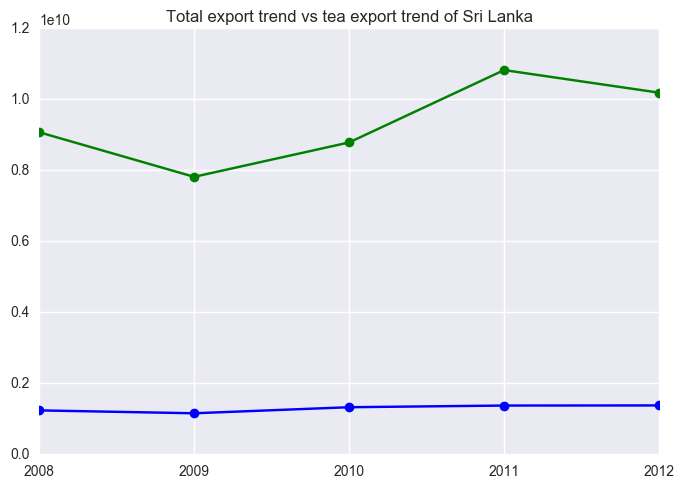

In [12]:
years = [2008,2009,2010,2011,2012]
x = np.array([0,1,2,3,4])
plt.xticks(x, years)
export = [sri_lanka_export2008,sri_lanka_export2009,sri_lanka_export2010,sri_lanka_export2011,sri_lanka_export2012]
tea = [sri_lanka_tea_export_2008,sri_lanka_tea_export_2009,sri_lanka_tea_export_2010,sri_lanka_tea_export_2011,sri_lanka_tea_export_2012]
plt.plot(x,export,marker='o',color = 'green',linestyle = 'solid')
plt.plot(x,tea,marker='o',color = 'blue',linestyle = 'solid')
plt.title('Total export trend vs tea export trend of Sri Lanka')
plt.show()

In [13]:
export

[origin
 lka    9.066647e+09
 Name: export_val, dtype: float64, origin
 lka    7.810513e+09
 Name: export_val, dtype: float64, origin
 lka    8.778992e+09
 Name: export_val, dtype: float64, origin
 lka    1.081625e+10
 Name: export_val, dtype: float64, origin
 lka    1.017980e+10
 Name: export_val, dtype: float64]

In [14]:
tea

[origin
 lka    1.235851e+09
 Name: export_val, dtype: float64, origin
 lka    1.154372e+09
 Name: export_val, dtype: float64, origin
 lka    1.324976e+09
 Name: export_val, dtype: float64, origin
 lka    1.371910e+09
 Name: export_val, dtype: float64, origin
 lka    1.375160e+09
 Name: export_val, dtype: float64]

In [18]:
mask = (WTN2010.dest!='xxb') & (WTN2010.origin!='xxb')

WTN2010[mask]

,year,origin,dest,hs07,export_val,import_val
9134246,2010,ago,bfa,9703,0.000000e+00,15048.0
9134247,2010,ago,civ,806,0.000000e+00,59603.0
9134248,2010,ago,civ,902,0.000000e+00,434125.0
9134249,2010,ago,civ,1202,0.000000e+00,10010.0
9134250,2010,ago,civ,1704,0.000000e+00,10663.0
9134251,2010,ago,civ,2207,0.000000e+00,4282.0
9134252,2010,ago,civ,2209,0.000000e+00,4209.0
9134253,2010,ago,civ,2526,0.000000e+00,4315.0
9134254,2010,ago,civ,2710,0.000000e+00,2024770.0
9134255,2010,ago,civ,2713,0.000000e+00,12966560.0


In [19]:
test=WTN2010[mask].groupby(by=['origin'])['export_val'].sum()
ahahahah = test.sort_values(ascending=False)[0:15].index
type(ahahahah)

pandas.indexes.base.Index

In [20]:
start = timeit.default_timer()
WTNWTN2008 = WTN[WTN['origin'].map(lambda x : x in ahahahah) & 
                     WTN['dest'].map(lambda x: x in ahahahah)]
stop = timeit.default_timer()
elapsed = stop - start
print elapsed

54.6323611736


In [21]:
WTNWTN2008.head()

,year,origin,dest,hs07,export_val,import_val
675105,2008,chn,jpn,106,7963686.84,1773880.12
675106,2008,chn,jpn,205,477359.30,0.00
675107,2008,chn,jpn,206,2759.00,0.00
675108,2008,chn,jpn,207,543551.31,0.00
675109,2008,chn,jpn,208,75270.52,0.00


Heatmap of exports

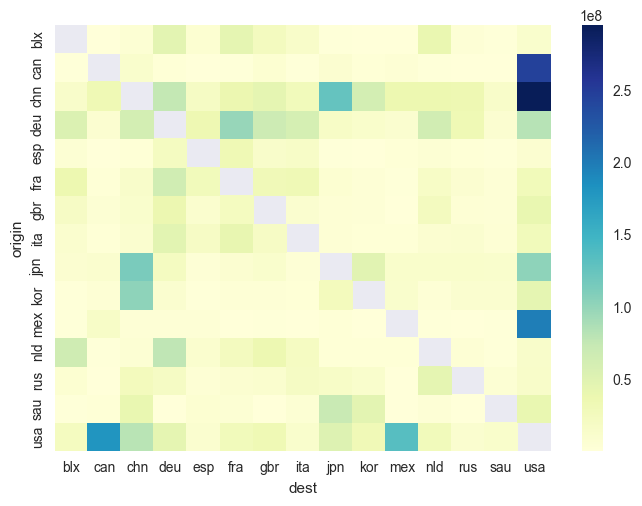

In [22]:
a = WTNWTN2008.pivot_table(index="origin",columns= "dest",values= "export_val")
heatmap = sns.heatmap(a, cmap="YlGnBu")
plt.savefig("heatmap.png",)

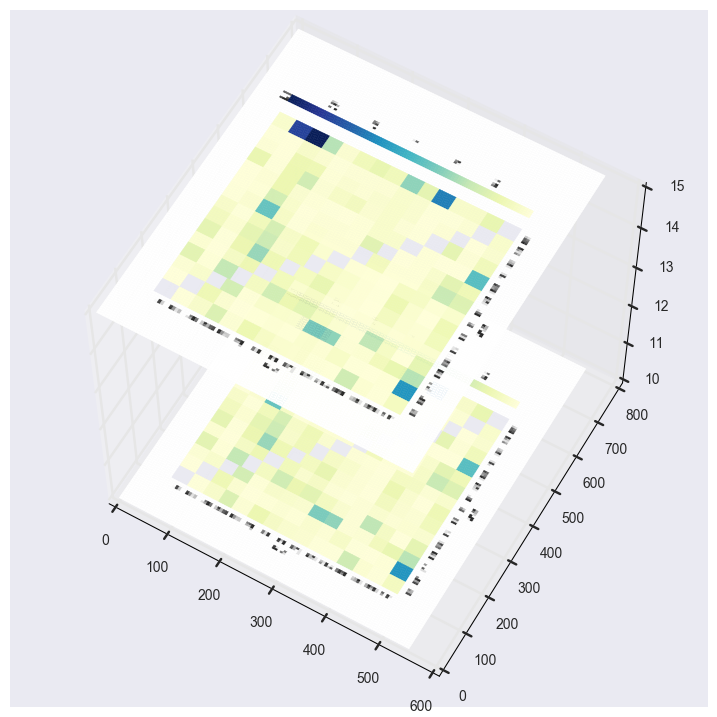

In [23]:
fn = get_sample_data("/Users/YuchenZheng/Downloads/heatmap.png", asfileobj=False)
img = read_png(fn)
x, y = np.ogrid[0:img.shape[0], 0:img.shape[1]]
plt.figure(figsize=(9,9))
ax = plt.gca(projection='3d')
ax.plot_surface(x, y, 10, rstride=5, cstride=5, facecolors=img, shade = False)
ax.plot_surface(x, y, 15, rstride=5, cstride=5, facecolors=img, shade = False)
#plt.show()

ax.view_init(60)
plt.show()

In [24]:
WTN.head()

,year,origin,dest,hs07,export_val,import_val
0,2008,ago,civ,902,0.00,3053887.0
1,2008,ago,civ,1511,0.00,31017.0
2,2008,ago,civ,1704,0.00,56428.0
3,2008,ago,civ,2710,932121.72,0.0
4,2008,ago,civ,2711,492622.69,0.0


In [25]:
mean = pd.DataFrame(WTN.groupby(['origin','dest','year'],as_index=False)['export_val'].count())#['export_val'].sum()

In [26]:
mean.head()

,origin,dest,year,export_val
0,abw,ant,2009,404
1,abw,ant,2010,383
2,abw,are,2008,2
3,abw,arg,2008,35
4,abw,arg,2009,63


In [27]:
filtered = mean[(~mean['origin'].str.contains("xx") & (~mean['dest'].str.contains("xx")))]

In [28]:
filtered.head()

,origin,dest,year,export_val
0,abw,ant,2009,404
1,abw,ant,2010,383
2,abw,are,2008,2
3,abw,arg,2008,35
4,abw,arg,2009,63


In [29]:
newdf2009 = pd.DataFrame(filtered[filtered.year==2009].groupby(['origin'],as_index=False)['dest'].count())
newdf2010 = pd.DataFrame(filtered[filtered.year==2010].groupby(['origin'],as_index=False)['dest'].count())

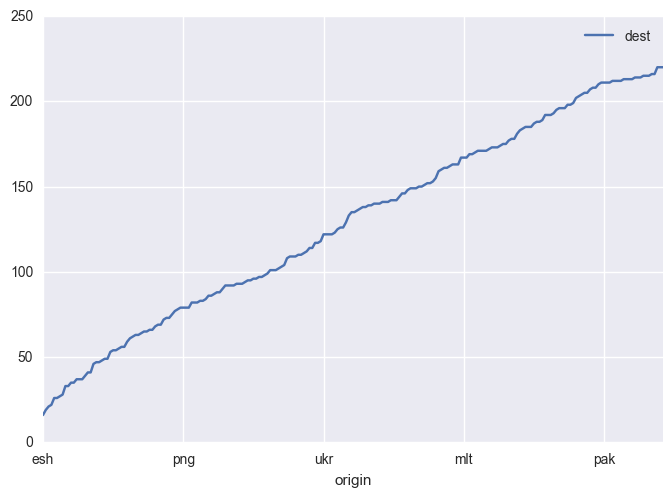

In [30]:
z = newdf2009.sort_values(by=['dest'])
zz = newdf2010.sort_values(by = ['dest'])
z = z.reset_index()
zz = zz.reset_index()
z.plot(x='origin',y='dest')

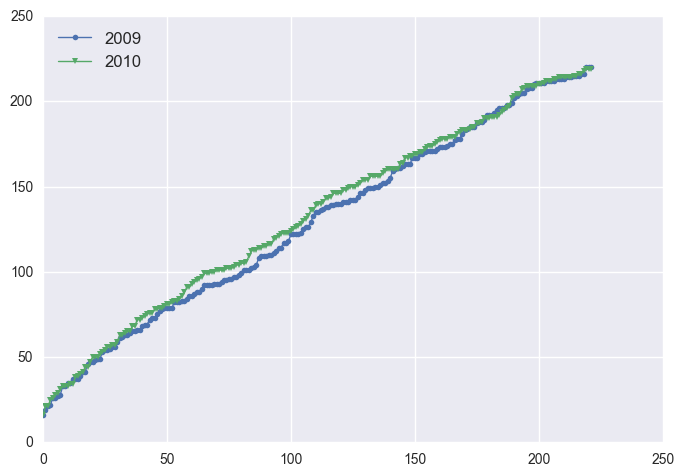

In [31]:
z['index'] = range(0,222,1)
zz['index'] = range(0,222,1)

plt.plot(z.dest, marker = 'o',linewidth=1,markersize=4)
plt.plot(zz.dest, '-v',linewidth=1,markersize=4)
plt.legend(['2009','2010'], loc=2,prop={'size':12})